# Аналитика в авиакомпании

**Цель** - изучение данных, полученных на предыдущих шагах исследования, о количестве рейсов авиакомпании в разрезе городов России и моделей самолетов.

Массивы данных содержат в себе информацию о количестве рейсов в разбивке по моделям самолетов за сентябрь 2018 г., а также о среднем количестве рейсов в разбивке по городам прилета за день в августе 2018 г. 

В ходе исследования решается ряд **задач**:
- импортирование файлов; 
- изучение полученной информациии;
- проверка на пропуски, корректность типа данных;
- проведение анализа рейсов:
    + зависимости количества рейсов от города;
    + зависимости количества рейсов от модели самолета;
    + выбор топ-10 городов по количеству рейсов.

## Содержание

[Обзор данных](#review)

[Анализ информации](#analysis)

- [Топ-10 городов по количеству рейсов](#top10)
- [Зависимость количества рейсов от города](#city_flight)
- [Зависимость количества рейсов от модели самолета](#model_flight)

[Общий вывод исследования](#conclusion)

#### Шаг 1. Изучение общей информации <a name="review"></a>

Импорт библиотек, которые потребуются для выполнения исследования:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Считывание файлов с данными в датафреймы:

In [2]:
flights_per_model = pd.read_csv('/datasets/query_1.csv')
avg_flights_per_city = pd.read_csv('/datasets/query_3.csv')

Получение данных из таблицы **flights_per_model**:

In [3]:
flights_per_model

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Общая информация о данных таблицы **flights_per_model**:

In [4]:
flights_per_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


В таблице **flights_per_model** представлена информация о количестве рейсов в разбивке по моделям самолетов за сентябрь 2018 г. В ней 2 столбца: 

- **model** - модель самолета / строковый тип данных
- **flights_amount** - количество рейсов для каждой модели самолетов в сентябре 2018 года / целочисл. тип данных

Общее количество моделей самолетов - 8. Пропусков нет, типы данных корректны.

---

Получение данных о первых 10 строках таблицы **avg_flights_per_city**:

In [5]:
avg_flights_per_city.head(10)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


Общая информация о данных таблицы **avg_flights_per_city**:

In [6]:
avg_flights_per_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


В таблице **avg_flights_per_city** представлена информация о среднем количестве рейсов в разбивке по городам прилета за день в августе 2018 г. В ней 2 столбца: 

- **city** - город прилета / строковый тип данных
- **average_flights** - среднее число прибывающих в день рейсов в августе 2018 г / вещественный тип данных

Общее количество записей о городах - 101. Пропусков нет, типы данных корректны.

#### Шаг 2. Анализ информации <a name="analysis"></a>

**Топ-10 городов по количеству рейсов** <a name="top10"></a>

Рассмотрим, в какие города в августе 2018 года ежедневно прилетало больше всего рейсов:

In [7]:
avg_flights_per_city.sort_values(by = 'average_flights', ascending = False).head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


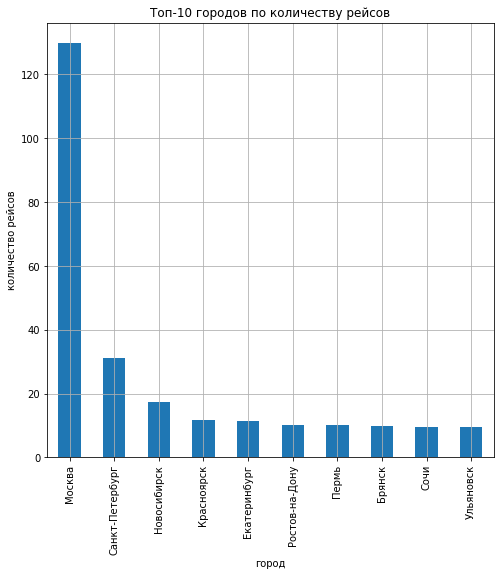

In [8]:
avg_flights_per_city.sort_values(by = 'average_flights', ascending = False).head(10)\
                            .plot(x = 'city', y = 'average_flights', grid = True, figsize = (8,8),\
                             title = 'Топ-10 городов по количеству рейсов', kind = 'bar', legend = False)
plt.xlabel('город')
plt.ylabel('количество рейсов')
plt.show()

Ожидаемо лидируют города-миллионники (Москва, Санкт-Петербург, Новосибирск, Красноярск, Екатеринбург, Ростов-на-Дону, Пермь). В топ-10 оказался Сочи, куда в августе массово прилетают отдыхающие, а также Брянск и Ульяновск. При этом Москва как крупнейший транспортный хаб, а также мировой деловой центр существенно превышает по рассмативаемому показателю все остальные города.

**Зависимость количества рейсов от города** <a name="city_flight"></a>

Построим аналогичный график и для других городов:

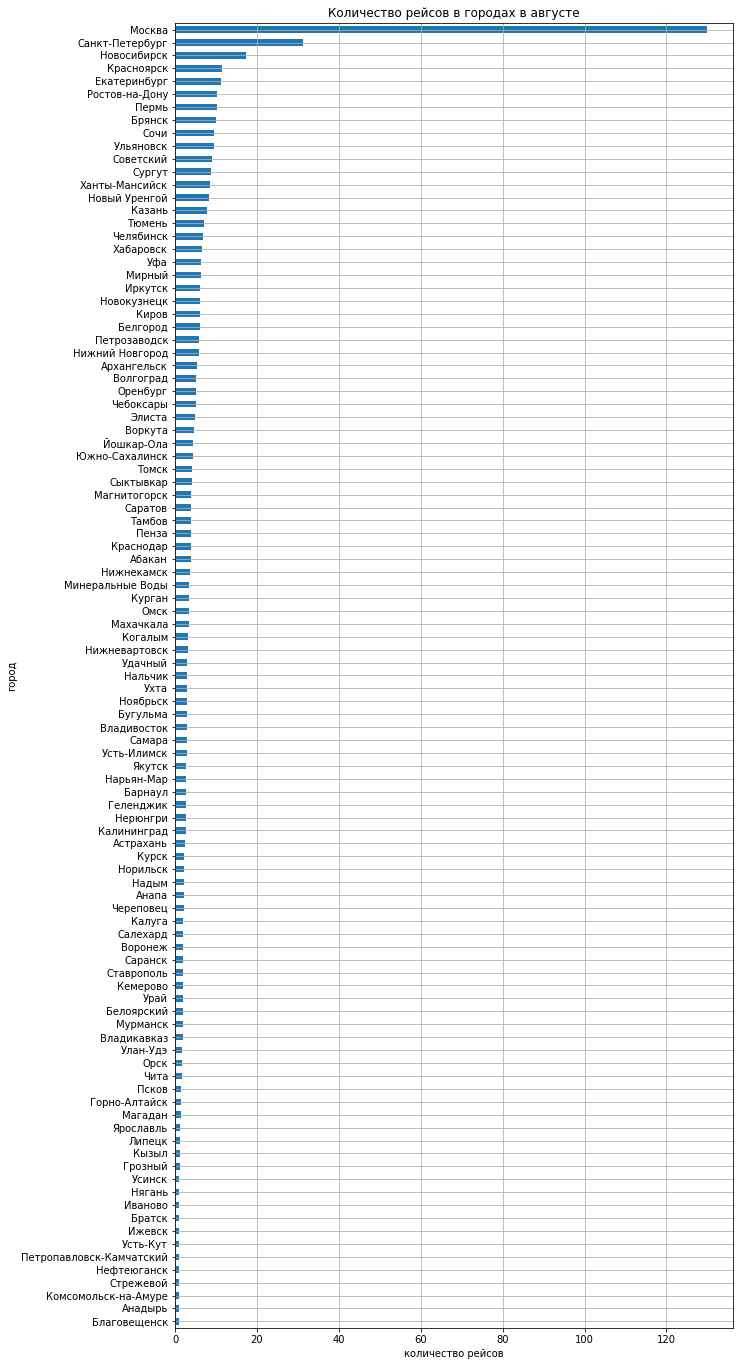

In [9]:
avg_flights_per_city.sort_values(by = 'average_flights', ascending = True)\
                            .plot(x = 'city', y = 'average_flights', grid = True, figsize = (10,24),\
                             title = 'Количество рейсов в городах в августе', kind = 'barh', legend = False)
plt.xlabel('количество рейсов')
plt.ylabel('город')
plt.show()

In [10]:
avg_flights_per_city['average_flights'].describe()

count    101.000000
mean       5.494189
std       13.119790
min        1.000000
25%        2.000000
50%        3.000000
75%        5.870968
max      129.774194
Name: average_flights, dtype: float64

Имеет место колоссальный разрыв между Москвой и прочими городами по числу прибывающих рейсов. В половине городов оно не превышает 3, Значение третьего квартиля - всего 5,87 (близко к медиане), максимальное значение 129,77 примерно в 4 раза превышает следующий результат, соответствующий Санкт-Петербургу.

**Зависимость количества рейсов от модели самолета** <a name="model_flight"></a>

Наконец, рассмотрим, какие модели самолетов чаще всего совершали рейсы в сентябре 2018 г:

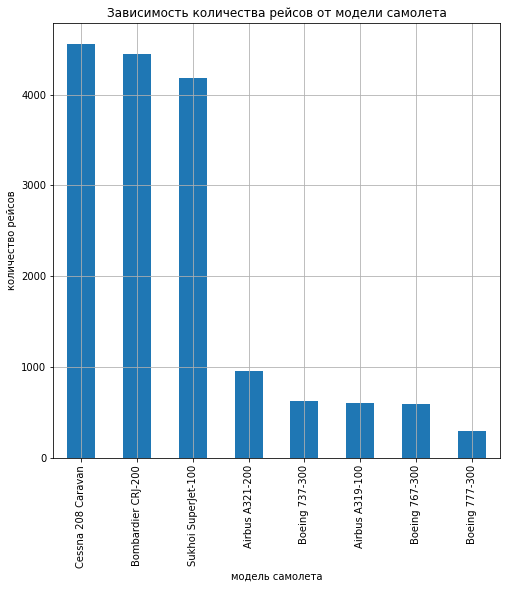

In [11]:
flights_per_model.sort_values(by = 'flights_amount', ascending = False).head(10)\
                            .plot(x = 'model', y = 'flights_amount', grid = True, figsize = (8,8),\
                             title = 'Зависимость количества рейсов от модели самолета', kind = 'bar', legend = False)
plt.xlabel('модель самолета')
plt.ylabel('количество рейсов')
plt.show()

Среди всех моделей с существенным отрывом лидируют три - Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100. И Cessna 208 Caravan, и Bombardier CRJ-200 - самолеты небольшой вместимости (10 пассажиров у первого и 50 у второго). Они востребованы для обслуживания местных линий, где меньше пассажиров и относительно небольшие расстояния, поэтому более выгодны авиакомпании. Популярность рейсов на Sukhoi SuperJet-100, вероятно, объясняется более низкой стоимостью самолета в сравнении с моделями Boeing и Airbus. Кроме того, модели Boeing и Airbus часто используются для зарубежных рейсов, которые не вошли в выборку.

#### Вывод <a name="conclusion"></a>

Среди всех городов по среднему числу прилетов в день на первом месте (130 рейсов) ожидаемо находится Москва с четырехкратным отрывом от Санкт-Петербурга, занимающего второе место. Далее располагаются города-миллионники, а также Сочи (т.к. анализировались данные за август). 

Среди всех моделей по числу выполненных рейсов выделяются три основных лидера - Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100. Первые два востребованы для обслуживания местных линий, где меньше пассажиров и относительно небольшие расстояния, поэтому более выгодны авиакомпании. Третий существенно дешевле, чем похожие модели зарубежного производства - Boeing и Airbus. Также на результат могло повлиять то, что модели Boeing и Airbus часто используются для зарубежных рейсов, которые не вошли в выборку.

На предыдущих шагах исследования было установлено, что проведение в городе фестиваля не влияет на количество проданных на рейсы билетов, поэтому можно посоветовать заказчику в дальнейшем провести исследование для поиска других факторов, повышающих спрос пассажиров, а также включить в него расходные критерии (цену на топливо, обслуживание авиапарка и т.п), без которых построение бизнес-плана не имеет особого смысла.